## Advent of Code 2017
https://github.com/mrhwick/advent-of-code-2017

[Puzzles can be found here.](http://adventofcode.com/2017)

### Imports

In [2]:
import (
    "fmt"
    "math"
    "strconv"
    "strings"
)

### Day 1: Inverse Captcha - Part One

The night before Christmas, one of Santa's Elves calls you in a panic. "The printer's broken! We can't print the Naughty or Nice List!" By the time you make it to sub-basement 17, there are only a few minutes until midnight. "We have a big problem," she says; "there must be almost fifty bugs in this system, but nothing else can print The List. Stand in this square, quick! There's no time to explain; if you can convince them to pay you in stars, you'll be able to--" She pulls a lever and the world goes blurry.

When your eyes can focus again, everything seems a lot more pixelated than before. She must have sent you inside the computer! You check the system clock: 25 milliseconds until midnight. With that much time, you should be able to collect all fifty stars by December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day millisecond in the advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

You're standing in a room with "digitization quarantine" written in LEDs along one wall. The only door is locked, but it includes a small interface. "Restricted Area - Strictly No Digitized Users Allowed."

It goes on to explain that you may only leave by solving a captcha to prove you're not a human. Apparently, you only get one millisecond to solve the captcha: too fast for a normal human, but it feels like hours to you.

The captcha requires you to review a sequence of digits (your puzzle input) and find the sum of all digits that match the next digit in the list. The list is circular, so the digit after the last digit is the first digit in the list.

For example:

- 1122 produces a sum of 3 (1 + 2) because the first digit (1) matches the second digit and the third digit (2) matches the fourth digit.
- 1111 produces 4 because each digit (all 1) matches the next.
- 1234 produces 0 because no digit matches the next.
- 91212129 produces 9 because the only digit that matches the next one is the last digit, 9.

My problem input:
```
951484596541141557316984781494999179679767747627132447513171626424561779662873157761442952212296685573452311263445163233493199211387838461594635666699422982947782623317333683978438123261326863959719777179228599319321138948466562743761584836184512984131635354116264899181952748224523953976485816295227945792555726121913344959454458829485471174415775278865324142733339789878929596275998341778873889585819916457474773252249179366599951454182657225576277834669222982366884688565754691273745959468648957498511326215934353963981471593984617554514519623785326888374742147318993423214834751785956958395133486656388454552769722562524415715913869946325551396638593398729938526424994348267935153555851552287223313383583669912941364344694725478258297498969517632881187394141593479818536194597976519254215932257653777455227477617957833273463216593642394215275314734914719726618923177918342664351954252667253233858814365351722938716621544226598956257753212248859258351363174782742336961425325381561575992352415514168782816173861148859478285339529151631429536819286498721812323861771638574344416879476255929929157912984151742613268754779685396125954595318134933366626594498249956388771723777242772654678448815844555372892574747735672368299826548254744359377667294764559334659523233146587568261116253155189394188696831691284711264872914348961888253386971994431352474717376878745948769171243242621219912378731755544387249443997382399714738351857752329367997665166956467544459817582915478514486541453932175598413554259672117364863112592515988922747164842668361925135551248923449968328385889877512156952725198691746951431443497496455761516486573476185321748523644283494181119399874324683922393547682851931435931276267766772798261563117954648576421741384823494187895272582575669685279986988357796138794326125852772995446355723211161523161886222562853546488411563473998633847953246787557146187696947831335722888918172961256498971868946237299523474841983527391489962357196433927251798764362493965894995592683296651874787384247326643886774966828657393717626591578321174832222434128817871765347278152799425565633521152643686221411129463425496425385516719682884157452772141585743166647191938727971366274357874252166721759
```

### Day 1: Inverse Captcha - Part One Solution

In [2]:
day1InputSource := "951484596541141557316984781494999179679767747627132447513171626424561779662873157761442952212296685573452311263445163233493199211387838461594635666699422982947782623317333683978438123261326863959719777179228599319321138948466562743761584836184512984131635354116264899181952748224523953976485816295227945792555726121913344959454458829485471174415775278865324142733339789878929596275998341778873889585819916457474773252249179366599951454182657225576277834669222982366884688565754691273745959468648957498511326215934353963981471593984617554514519623785326888374742147318993423214834751785956958395133486656388454552769722562524415715913869946325551396638593398729938526424994348267935153555851552287223313383583669912941364344694725478258297498969517632881187394141593479818536194597976519254215932257653777455227477617957833273463216593642394215275314734914719726618923177918342664351954252667253233858814365351722938716621544226598956257753212248859258351363174782742336961425325381561575992352415514168782816173861148859478285339529151631429536819286498721812323861771638574344416879476255929929157912984151742613268754779685396125954595318134933366626594498249956388771723777242772654678448815844555372892574747735672368299826548254744359377667294764559334659523233146587568261116253155189394188696831691284711264872914348961888253386971994431352474717376878745948769171243242621219912378731755544387249443997382399714738351857752329367997665166956467544459817582915478514486541453932175598413554259672117364863112592515988922747164842668361925135551248923449968328385889877512156952725198691746951431443497496455761516486573476185321748523644283494181119399874324683922393547682851931435931276267766772798261563117954648576421741384823494187895272582575669685279986988357796138794326125852772995446355723211161523161886222562853546488411563473998633847953246787557146187696947831335722888918172961256498971868946237299523474841983527391489962357196433927251798764362493965894995592683296651874787384247326643886774966828657393717626591578321174832222434128817871765347278152799425565633521152643686221411129463425496425385516719682884157452772141585743166647191938727971366274357874252166721759"

// Test Examples
// day1InputSource := "1221"
// day1InputSource := "1111"
// day1InputSource := "1234"
// day1InputSource := "91212129"

In [3]:
// O(n) solution below:
//
// Preprocess by adding the first digit to the end of the input and appending a guaranteed no-match
// Adding a guaranteed no-match at the end ensures that we can process the input in one pass without getting too funky.
// input := day1InputSource + string(day1InputSource[0]) + string(day1InputSource[0] + 1)
//
//
// var accumulator int
// for i := 0; i < len(input); i++ {
//     if i < len(input) && input[i] == input[i+1] {
//         accumulator = accumulator + (input[i] - '0')
//     }
// }



// O(log(n)) solution below:

input := day1InputSource + string(day1InputSource[0])

func countMatches(input string) int {
    // Base case, no matches possible
    if len(input) < 2 {
        return 0
    }

    // Determine midpoint of input
    midpoint := int(math.Floor(len(input) / 2.0))

    left := input[:midpoint]
    right := input[midpoint+1:]

    total := 0
    
    if len(left) > 0 && left[midpoint-1] == input[midpoint] {
        total = total + (input[midpoint] - '0')
    }

    if len(right) > 0 && right[0] == input[midpoint] {
        total = total + (input[midpoint] - '0')
    }
    return total + countMatches(left) + countMatches(right)
}

fmt.Println(countMatches(input))

1341


### Day 1: Inverse Captcha - Part Two

You notice a progress bar that jumps to 50% completion. Apparently, the door isn't yet satisfied, but it did emit a star as encouragement. The instructions change:

Now, instead of considering the next digit, it wants you to consider the digit halfway around the circular list. That is, if your list contains 10 items, only include a digit in your sum if the digit 10/2 = 5 steps forward matches it. Fortunately, your list has an even number of elements.

For example:

- 1212 produces 6: the list contains 4 items, and all four digits match the digit 2 items ahead.
- 1221 produces 0, because every comparison is between a 1 and a 2.
- 123425 produces 4, because both 2s match each other, but no other digit has a match.
- 123123 produces 12.
- 12131415 produces 4.

In [4]:
input = day1InputSource
// input = "1212"

accumulator = 0
halfDistance := len(input) / 2
for i := 0; i < len(input); i++ {
    halfDistanceIndex := (i + halfDistance) % len(input)
    if input[i] == input[halfDistanceIndex] {
        accumulator = accumulator + (input[i] - '0')
    }
}
fmt.Println(accumulator)

ERROR: repl.go:4:1: undefined identifier: accumulator
repl.go:9:9: undefined identifier: accumulator
repl.go:12:13: undefined identifier: accumulator


### Day 2: Corruption Checksum - Part One
As you walk through the door, a glowing humanoid shape yells in your direction. "You there! Your state appears to be idle. Come help us repair the corruption in this spreadsheet - if we take another millisecond, we'll have to display an hourglass cursor!"

The spreadsheet consists of rows of apparently-random numbers. To make sure the recovery process is on the right track, they need you to calculate the spreadsheet's checksum. For each row, determine the difference between the largest value and the smallest value; the checksum is the sum of all of these differences.

For example, given the following spreadsheet:

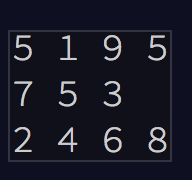

- The first row's largest and smallest values are 9 and 1, and their difference is 8.
- The second row's largest and smallest values are 7 and 3, and their difference is 4.
- The third row's difference is 6.

In this example, the spreadsheet's checksum would be 8 + 4 + 6 = 18.

What is the checksum for the spreadsheet in your puzzle input?

My problem input:

```
515	912	619	2043	96	93	2242	1385	2110	860	2255	621	1480	118	1230	99
161	6142	142	1742	237	6969	211	4314	5410	4413	3216	6330	261	3929	5552	109
1956	4470	3577	619	105	3996	128	1666	720	4052	108	132	2652	306	1892	1869
2163	99	2257	895	112	1771	1366	1631	2064	2146	103	865	123	1907	2362	876
1955	3260	1539	764	185	5493	5365	5483	4973	175	207	1538	4824	205	1784	2503
181	3328	2274	3798	1289	2772	4037	851	1722	3792	175	603	725	158	2937	174
405	247	2083	956	725	258	2044	206	2054	561	2223	2003	2500	355	306	2248
837	937	225	1115	446	451	160	1219	56	61	62	922	58	1228	1217	1302
1371	1062	2267	111	135	2113	1503	2130	1995	2191	129	2494	2220	739	138	1907
3892	148	2944	371	135	1525	3201	3506	3930	3207	115	3700	2791	597	3314	132
259	162	186	281	210	180	184	93	135	208	88	178	96	25	103	161
1080	247	1036	936	108	971	908	1035	123	974	103	1064	129	1189	1089	938
148	1874	122	702	922	2271	123	111	454	1872	2142	2378	126	813	1865	1506
842	267	230	1665	2274	236	262	1714	3281	4804	4404	3833	661	4248	3893	1105
1112	1260	809	72	1104	156	104	1253	793	462	608	84	99	1174	449	929
707	668	1778	1687	2073	1892	62	1139	908	78	1885	800	945	712	57	65
```

In [5]:
day2Input := `515	912	619	2043	96	93	2242	1385	2110	860	2255	621	1480	118	1230	99
161	6142	142	1742	237	6969	211	4314	5410	4413	3216	6330	261	3929	5552	109
1956	4470	3577	619	105	3996	128	1666	720	4052	108	132	2652	306	1892	1869
2163	99	2257	895	112	1771	1366	1631	2064	2146	103	865	123	1907	2362	876
1955	3260	1539	764	185	5493	5365	5483	4973	175	207	1538	4824	205	1784	2503
181	3328	2274	3798	1289	2772	4037	851	1722	3792	175	603	725	158	2937	174
405	247	2083	956	725	258	2044	206	2054	561	2223	2003	2500	355	306	2248
837	937	225	1115	446	451	160	1219	56	61	62	922	58	1228	1217	1302
1371	1062	2267	111	135	2113	1503	2130	1995	2191	129	2494	2220	739	138	1907
3892	148	2944	371	135	1525	3201	3506	3930	3207	115	3700	2791	597	3314	132
259	162	186	281	210	180	184	93	135	208	88	178	96	25	103	161
1080	247	1036	936	108	971	908	1035	123	974	103	1064	129	1189	1089	938
148	1874	122	702	922	2271	123	111	454	1872	2142	2378	126	813	1865	1506
842	267	230	1665	2274	236	262	1714	3281	4804	4404	3833	661	4248	3893	1105
1112	1260	809	72	1104	156	104	1253	793	462	608	84	99	1174	449	929
707	668	1778	1687	2073	1892	62	1139	908	78	1885	800	945	712	57	65`


In [9]:
day2Rows := strings.Split(day2Input, "\n")

total := 0

for i, row := range day2Rows {
    nums := strings.Split(row, "\t")
    max := 0
    min, _ := strconv.Atoi(nums[0])
    for _, num := range nums {
        intNum, _ := strconv.Atoi(num)
        if intNum < min {
            min = intNum
        }
        if intNum > max {
            max = intNum
        }
    }
    total = total + max - min
}

fmt.Println(total)

45972


ERROR: // warning: redefined identifier: day2Rows
// warning: redefined identifier: total


### Day 2: Corruption Checksum - Part Two
"Great work; looks like we're on the right track after all. Here's a star for your effort." However, the program seems a little worried. Can programs be worried?

"Based on what we're seeing, it looks like all the User wanted is some information about the evenly divisible values in the spreadsheet. Unfortunately, none of us are equipped for that kind of calculation - most of us specialize in bitwise operations."

It sounds like the goal is to find the only two numbers in each row where one evenly divides the other - that is, where the result of the division operation is a whole number. They would like you to find those numbers on each line, divide them, and add up each line's result.

For example, given the following spreadsheet:

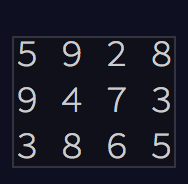

- In the first row, the only two numbers that evenly divide are 8 and 2; the result of this division is 4.
- In the second row, the two numbers are 9 and 3; the result is 3.
- In the third row, the result is 2.
- In this example, the sum of the results would be 4 + 3 + 2 = 9.

What is the sum of each row's result in your puzzle input?

In [13]:
day2Rows := strings.Split(day2Input, "\n")

total := 0

for _, row := range day2Rows {
    nums := strings.Split(row, "\t")
    for i, num := range nums {
        intNum, _ := strconv.Atoi(num)
        for j, num2 := range nums {
            if i == j { continue }
            intNum2, _ := strconv.Atoi(num2)
            if intNum % intNum2 == 0 {
                if intNum < intNum2 {
                    total = total + intNum2 / intNum
                } else {
                    total = total + intNum / intNum2
                }
            }
        }
    }
}

fmt.Println(total)

326


ERROR: // warning: redefined identifier: day2Rows
// warning: redefined identifier: total


### Day 3: Spiral Memory - Part One

You come across an experimental new kind of memory stored on an infinite two-dimensional grid.

Each square on the grid is allocated in a spiral pattern starting at a location marked 1 and then counting up while spiraling outward. For example, the first few squares are allocated like this:

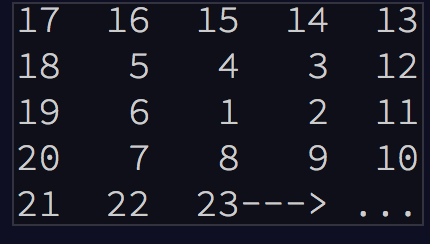

While this is very space-efficient (no squares are skipped), requested data must be carried back to square 1 (the location of the only access port for this memory system) by programs that can only move up, down, left, or right. They always take the shortest path: the Manhattan Distance between the location of the data and square 1.

For example:

- Data from square 1 is carried 0 steps, since it's at the access port.
- Data from square 12 is carried 3 steps, such as: down, left, left.
- Data from square 23 is carried only 2 steps: up twice.
- Data from square 1024 must be carried 31 steps.

How many steps are required to carry the data from the square identified in your puzzle input all the way to the access port?

In [33]:
day3Input := 347991
// day3Input = 10

ERROR: // warning: redefined identifier: day3Input


In [34]:
func widthOf(num int) int {
    floatNum := float64(num)
    return math.Ceil((math.Sqrt(floatNum)+1) / 2 - 1) * 2
}

func bottomRightOfRing(num int) int {
    return math.Pow(widthOf(num) + 1, 2)
}

func distanceFromOrigin(num int) int {
    if num == 1 {
        return 0
    }
    
    width := widthOf(num)
    bottomRight := bottomRightOfRing(num)
    indexAlongEdge := (bottomRight - num) % width
    distanceFromRingToOrigin := width / 2
    midpointAlongEdge := width / 2
    return math.Abs(midpointAlongEdge - indexAlongEdge) + distanceFromRingToOrigin
}

ERROR: // warning: redefined identifier: widthOf
// warning: redefined identifier: bottomRightOfRing
// warning: redefined identifier: distanceFromOrigin


In [35]:
fmt.Println(widthOf(day3Input))
fmt.Println(bottomRightOfRing(day3Input))
fmt.Println(distanceFromOrigin(day3Input))

590
349281
480
